In [1]:
import os,sys
WORKSPACE_DIR = '../..' 
PROJECT_DIR = f'{WORKSPACE_DIR}/barchartapi' 
WORKING_DIR = f'{PROJECT_DIR}/barchartapi' 
if WORKING_DIR not in sys.path:
    sys.path.append(WORKING_DIR)
if PROJECT_DIR not in sys.path:
    sys.path.append(PROJECT_DIR)
if WORKSPACE_DIR not in sys.path:
    sys.path.append(WORKSPACE_DIR)    
import barchart_api as bcapi
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import gridspec
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
init_notebook_mode(connected=True)

import datetime
import pandas as pd
import plot_utilities as pu
import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")


/Users/bperlman1/Virtualenvs3/dashrisk5/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/


In [2]:
import importlib
importlib.reload(pu)

Barchart OnDemand Client: https://marketdata.websol.barchart.com/
Barchart OnDemand Client: https://marketdata.websol.barchart.com/


<module 'plot_utilities' from '/Users/bperlman1/Documents/billybyte/pyliverisk/barchartapi/barchartapi/plot_utilities.py'>

In [3]:
# set this to 'free' or 'paid'
endpoint = 'free' # free or paid

# set the bar_type and the interval
bar_type='daily' # minutes, daily, monthly
interval=1 # 1,5,15,30,60

# create an instance 
api_key = open(f'./temp_folder/{endpoint}_api_key.txt','r').read()
endpoint_type=f'{endpoint}_url'
bch = bcapi.BcHist(api_key, bar_type=bar_type, interval=interval,endpoint_type = endpoint_type)


Barchart OnDemand Client: https://marketdata.websol.barchart.com/


In [4]:
df_cb = bch.get_history('SIY00',20190212,20190812)


In [5]:
df_cb[1]

,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest
0,SIY00,2020-06-23T00:00:00-05:00,2020-06-23,17.7029,17.9789,17.6702,17.9432,0,0
1,SIY00,2020-06-24T00:00:00-05:00,2020-06-24,17.9425,18.0223,17.4772,17.4822,0,0
2,SIY00,2020-06-25T00:00:00-05:00,2020-06-25,17.4821,17.7861,17.4487,17.7861,0,0
3,SIY00,2020-06-26T00:00:00-05:00,2020-06-26,17.7868,17.8818,17.5382,17.7596,0,0
4,SIY00,2020-06-29T00:00:00-05:00,2020-06-29,17.7586,17.9178,17.7031,17.8424,0,0
...,...,...,...,...,...,...,...,...,...
126,SIY00,2020-12-16T00:00:00-06:00,2020-12-16,24.4898,25.3796,24.4468,25.3457,0,0
127,SIY00,2020-12-17T00:00:00-06:00,2020-12-17,25.3463,26.0536,25.1818,26.0532,0,0
128,SIY00,2020-12-18T00:00:00-06:00,2020-12-18,26.0537,26.0582,25.6671,25.7804,0,0
129,SIY00,2020-12-21T00:00:00-06:00,2020-12-21,25.8105,27.2640,25.7198,26.1665,0,0


In [6]:
yy = str(datetime.datetime.now().year)[2:]
mm = datetime.datetime.now().month
if mm > 6:
    yy = str(int(yy) + 1)
short_name = f'CLZ{yy}'
days_to_fetch = 120

dt_end = datetime.datetime.now()
dt_beg = dt_end - datetime.timedelta(days_to_fetch)
beg_yyyymmdd = '%04d%02d%02d' %(dt_beg.year,dt_beg.month,dt_beg.day)#20181201
end_yyyymmdd = '%04d%02d%02d' %(dt_end.year,dt_end.month,dt_end.day)#20190219

tup = bch.get_history(short_name, beg_yyyymmdd, end_yyyymmdd)
print(f'get_history: {short_name} WRITING DATA {datetime.datetime.now()}')
df_hist = tup[1]
def __full_date(d):
    year = int(str(d)[0:4])
    month = int(str(d)[5:7])
    day = int(str(d)[8:10])
    hour = int(str(d)[11:13])
    minute = int(str(d)[14:16])
    dt = datetime.datetime(year,month,day,hour,minute)
    return(dt)
    
df_hist['date'] = df_hist.timestamp.apply(__full_date)
print(f'get_history: {short_name} END {datetime.datetime.now()}')
df_hist.tail()

get_history: CLZ21 WRITING DATA 2020-12-23 10:18:44.178504
get_history: CLZ21 END 2020-12-23 10:18:44.183388


,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest,date
79,CLZ21,2020-12-16T00:00:00-06:00,2020-12-16,46.94,47.39,46.80,47.29,41532,273783,2020-12-16
80,CLZ21,2020-12-17T00:00:00-06:00,2020-12-17,47.27,47.97,47.25,47.93,32772,273506,2020-12-17
81,CLZ21,2020-12-18T00:00:00-06:00,2020-12-18,47.82,48.50,47.64,48.37,53090,272276,2020-12-18
82,CLZ21,2020-12-21T00:00:00-06:00,2020-12-21,48.35,48.37,45.80,47.37,48432,268997,2020-12-21
83,CLZ21,2020-12-22T00:00:00-06:00,2020-12-22,47.29,47.33,46.11,46.66,31904,271059,2020-12-22


___
### Create Candlestick charts for each day's 30 minute intra-day data
___

In [8]:
if endpoint != 'free':
    for day in df_hist.tradingDay.unique():
        try:
            fig,axs = pu.candles(df_hist[df_hist.tradingDay==day])
            plt.rcParams.update({'figure.max_open_warning': 0})
        except Exception as e:
            print(f'ERROR FOR DAY {day}')
            print(str(e))


### Show a barchart of the  daily history of percent changes between CLX19 and XLE

In [9]:
beg_yyyymmdd
# status,df_clx19 = bch.get_history('CLX19',20190801,20191001)
# status,df_xle = bch.get_history('XLE',20190801,20191001)
status,df_xle = bch.get_history('XLE',beg_yyyymmdd,end_yyyymmdd)
# df_clx19['pct_cl'] = df_clx19.close.pct_change()
df_hist['pct_cl'] = df_hist.close.pct_change()
df_xle['pct_xle'] = df_xle.close.pct_change()

In [10]:
df_xle

,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest,pct_xle
0,XLE,2020-08-25T00:00:00-04:00,2020-08-25,36.13430,36.18283,35.26055,35.43530,20722990,None,NaN
1,XLE,2020-08-26T00:00:00-04:00,2020-08-26,35.38676,35.38676,34.63922,34.68776,18542072,None,-0.021096
2,XLE,2020-08-27T00:00:00-04:00,2020-08-27,34.69747,34.98872,34.32855,34.75571,22928422,None,0.001959
3,XLE,2020-08-28T00:00:00-04:00,2020-08-28,34.89163,35.48384,34.71688,35.37704,15012927,None,0.017877
4,XLE,2020-08-31T00:00:00-04:00,2020-08-31,35.42559,35.47413,34.61009,34.61009,19356118,None,-0.021679
...,...,...,...,...,...,...,...,...,...,...
79,XLE,2020-12-16T00:00:00-05:00,2020-12-16,40.02469,40.17271,39.45235,39.72865,24132906,None,-0.004943
80,XLE,2020-12-17T00:00:00-05:00,2020-12-17,40.08390,40.09377,39.30433,39.54116,23491642,None,-0.004719
81,XLE,2020-12-18T00:00:00-05:00,2020-12-18,39.46222,39.67931,38.57409,38.88000,37059204,None,-0.016721
82,XLE,2020-12-21T00:00:00-05:00,2020-12-21,37.41000,38.46460,37.01500,38.13000,40079400,None,-0.019290


In [12]:
df_hist

,symbol,timestamp,tradingDay,open,high,low,close,volume,openInterest,date,pct_cl
0,CLZ21,2020-08-25T00:00:00-05:00,2020-08-25,45.28,46.14,45.28,45.91,35237,192479,2020-08-25,NaN
1,CLZ21,2020-08-26T00:00:00-05:00,2020-08-26,45.99,46.13,45.66,45.87,26950,193914,2020-08-26,-0.000871
2,CLZ21,2020-08-27T00:00:00-05:00,2020-08-27,45.88,45.90,45.02,45.41,18008,193941,2020-08-27,-0.010028
3,CLZ21,2020-08-28T00:00:00-05:00,2020-08-28,45.37,45.80,45.24,45.71,23219,193992,2020-08-28,0.006606
4,CLZ21,2020-08-31T00:00:00-05:00,2020-08-31,45.67,46.11,45.14,45.21,18144,193450,2020-08-31,-0.010939
...,...,...,...,...,...,...,...,...,...,...,...
79,CLZ21,2020-12-16T00:00:00-06:00,2020-12-16,46.94,47.39,46.80,47.29,41532,273783,2020-12-16,0.005315
80,CLZ21,2020-12-17T00:00:00-06:00,2020-12-17,47.27,47.97,47.25,47.93,32772,273506,2020-12-17,0.013534
81,CLZ21,2020-12-18T00:00:00-06:00,2020-12-18,47.82,48.50,47.64,48.37,53090,272276,2020-12-18,0.009180
82,CLZ21,2020-12-21T00:00:00-06:00,2020-12-21,48.35,48.37,45.80,47.37,48432,268997,2020-12-21,-0.020674


In [13]:
df_both = df_hist[['tradingDay','pct_cl']].merge(df_xle[['tradingDay','pct_xle']],on='tradingDay',how='inner')

In [14]:
df_both

,tradingDay,pct_cl,pct_xle
0,2020-08-25,NaN,NaN
1,2020-08-26,-0.000871,-0.021096
2,2020-08-27,-0.010028,0.001959
3,2020-08-28,0.006606,0.017877
4,2020-08-31,-0.010939,-0.021679
...,...,...,...
79,2020-12-16,0.005315,-0.004943
80,2020-12-17,0.013534,-0.004719
81,2020-12-18,0.009180,-0.016721
82,2020-12-21,-0.020674,-0.019290


In [15]:
f = pu.plotly_pandas(df_both,'tradingDay',bar_plot=True,alt_yaxis=False,plot_title="CL vs XLE Percent Changes")
iplot(f)

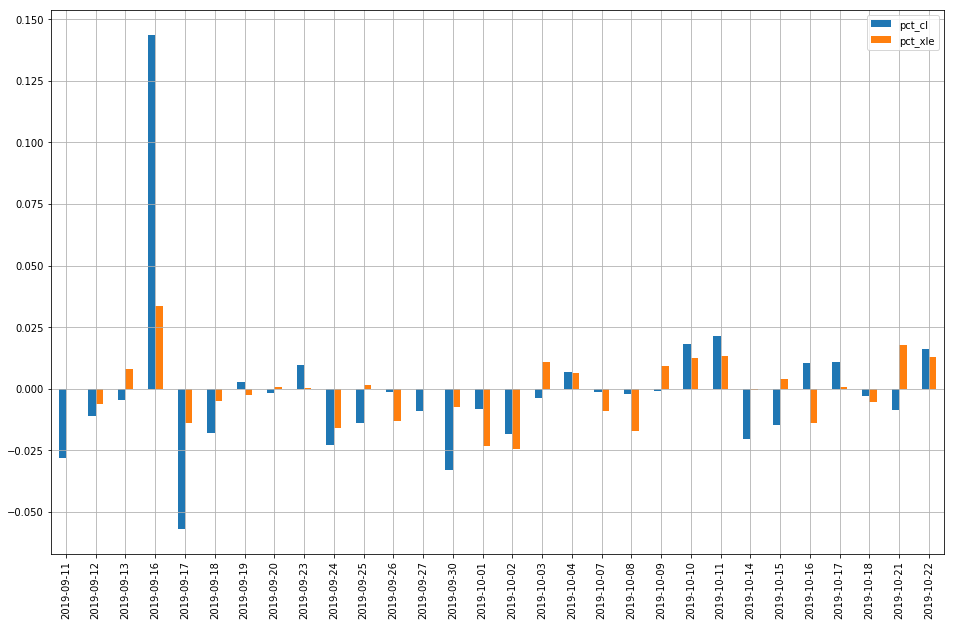

In [21]:
f2 = pu.plot_pandas(df_both,'tradingDay',bar_plot=True,alt_yaxis=False,)

### End

In [28]:
??pu.plotly_pandas